## Viewing assests with Yfinance

### Imports

Here we will import some tools to manipulate and visualizate the datas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt
import datetime
import matplotlib.animation as animation


sns.set_theme()
sns.set(rc={'figure.figsize':(25,19)})

from IPython.core.display import HTML

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


pd.set_option('display.max_columns', None)

pd.set_option('display.max_colwidth', None)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Defining Assests

For this action we use the tool Yfinance, wich need some assests to searchin the adjusted closing value on web. Also it is necessary create two more variables: The start and the end of searching.


In [2]:
assests = ['ITSA4.SA','BBDC4.SA','BBSE3.SA','EMBR3.SA','MXRF11.SA','ABEV3.SA']

### Searching the adjusted closing value

Here we are using the variables created on previous section of this notebook and using a looping for populate the DataFrame.

In [3]:
df1 = pd.DataFrame()

for i in assests:
    df1[i] = yf.download(i,
                            start = '2021-01-01',
                            end = date.today())['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Here we can see some adjusted closing of the assests.**

In [4]:
df1.head()

,ITSA4.SA,BBDC4.SA,BBSE3.SA,EMBR3.SA,MXRF11.SA,ABEV3.SA
Date,,,,,,
2021-01-04,11.125,23.307,28.208,8.370,10.460,15.407
2021-01-05,11.039,23.165,27.680,8.570,10.450,15.735
2021-01-06,11.260,23.932,27.229,8.900,10.460,16.053
2021-01-07,11.713,24.568,27.805,8.880,10.460,15.974
2021-01-08,11.684,24.356,28.668,8.810,10.460,16.452


**For a better view, the datas need be normalized. For this, we'll divide the all rows for the first price of the assests.**

This procedure makes the assets leave the same value range, providing support for a better analysis.

In [5]:
normalized_data = df1/df1.iloc[0]
normalized_data.head().reset_index()

,Date,ITSA4.SA,BBDC4.SA,BBSE3.SA,EMBR3.SA,MXRF11.SA,ABEV3.SA
0,2021-01-04,1.000,1.000,1.000,1.000,1.000,1.000
1,2021-01-05,0.992,0.994,0.981,1.024,0.999,1.021
2,2021-01-06,1.012,1.027,0.965,1.063,1.000,1.042
3,2021-01-07,1.053,1.054,0.986,1.061,1.000,1.037
4,2021-01-08,1.050,1.045,1.016,1.053,1.000,1.068


### Viewing Assests

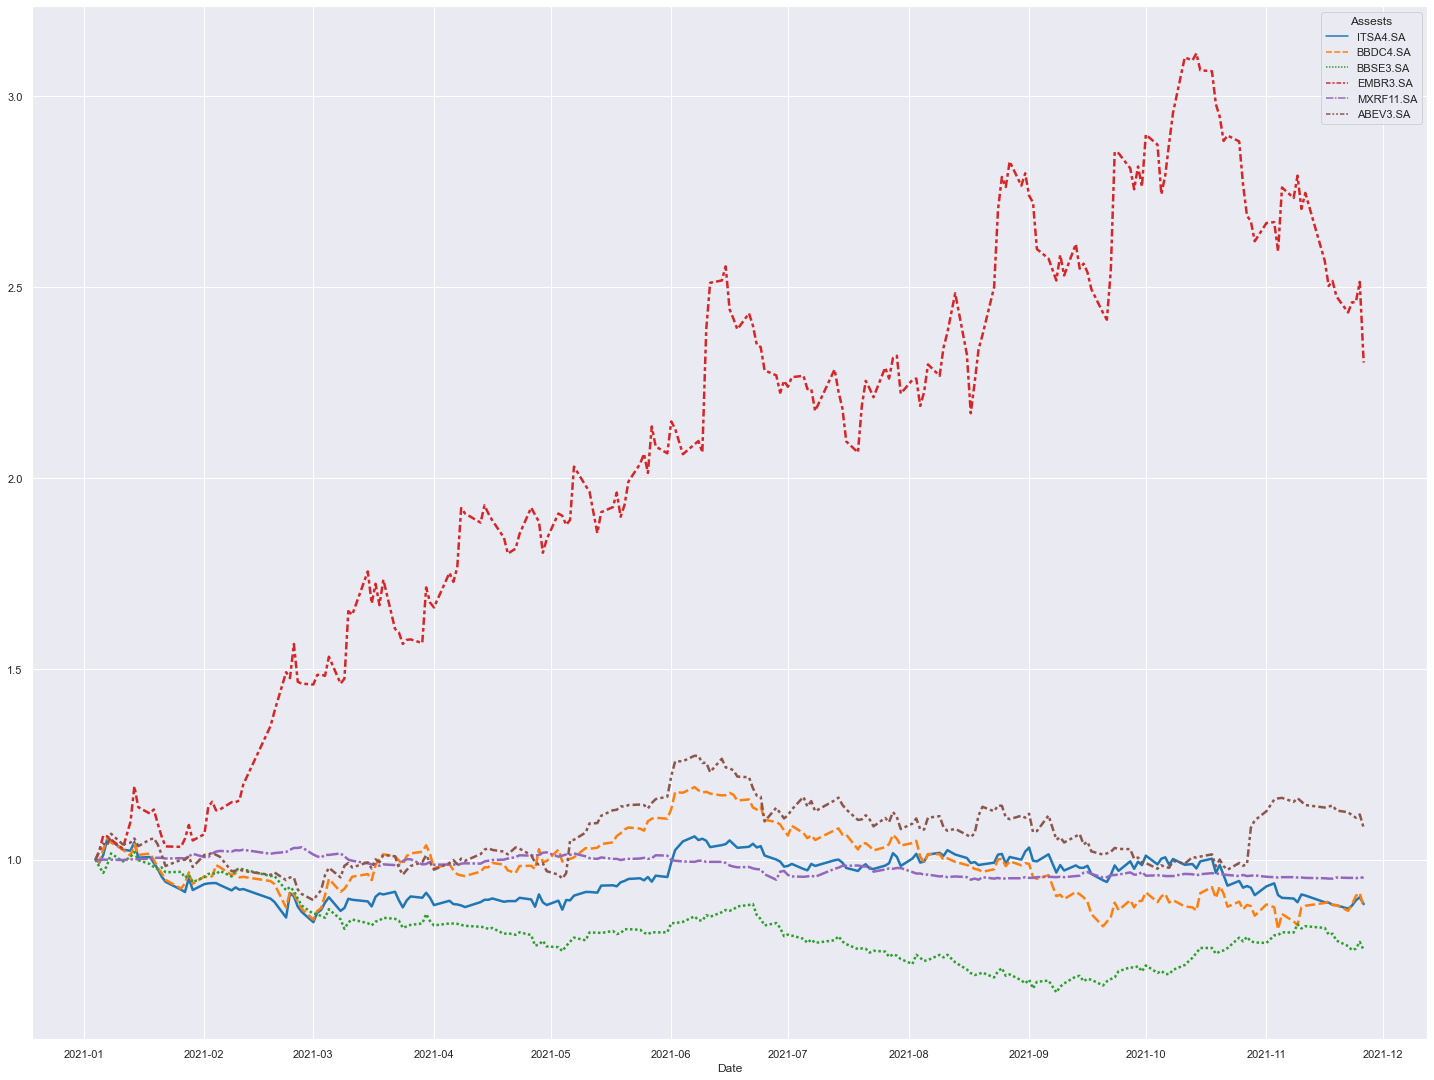

In [6]:
aux = sns.lineplot(data = normalized_data, palette = 'tab10', linewidth = 2.5);
plt.legend(title = 'Assests');